First of all, let’s define all the necessary libraries and let’s see what kind of data we’re dealing with.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np

print(tf.__version__)

2.4.1


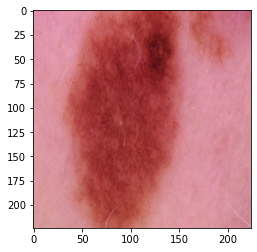

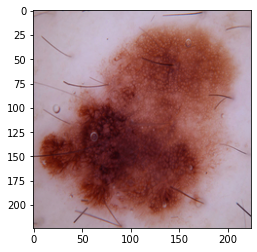

In [2]:
# set the directory path

base_dir = './archive/'
train_dir = base_dir + '/train'
test_dir = base_dir +'/test'

%matplotlib inline
image = mpimg.imread(test_dir+'/benign/1003.jpg')
plt.imshow(image)
plt.show()

image2 = mpimg.imread(test_dir+'/malignant/1007.jpg')
plt.imshow(image2)
plt.show()


Data is approximately 180MB in size. It might become a problem to feed the model with this amount of data, so we will be using the ImageDataGenerator.
A Python generator is a neat way of passing a tuple of data to a model. Generator functions are a special kind of function that returns a lazy iterator. These are objects that you can loop over like a list. However, unlike lists, lazy iterators do not store their contents in memory.


Data augmentation is a set of techniques used to increase the amount of data by adding slightly modified copies of already existing data or newly created synthetic data from existing data. It acts as a regularizer and helps reduce overfitting when training a machine learning model. For full documentation, check the ImageDataGenerator docs on TensorFlow. There is no need to augment test data, since they serve as an evaluation metrics.


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale=1/255, rotation_range=30, shear_range=0.2, zoom_range=0.3, height_shift_range=0.4)
test_gen = ImageDataGenerator(rescale=1/255)

train_dataset = train_gen.flow_from_directory(train_dir, target_size=(150,150),class_mode='binary', batch_size=64)
test_dataset = test_gen.flow_from_directory(test_dir, target_size=(150,150),class_mode='binary', batch_size=64)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


Since we set the target size to be 150x150 in the generator, we can easily define it in the first layer of our network.


The model is comprised of three convolutional layers each followed by a pooling layer, a Flatten layer, and three dense layers, the last one being a sigmoid gate. The rest is history.


In [8]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = tf.keras.Sequential([
    Conv2D(16,(3,3), input_shape=(150,150,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu', padding='valid'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [9]:
#early_stopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='auto', patience=2)

history = model.fit(train_dataset, validation_data = test_dataset, epochs=30, verbose=2)


Epoch 1/30
42/42 - 47s - loss: 0.8588 - accuracy: 0.5798 - val_loss: 0.6606 - val_accuracy: 0.5667
Epoch 2/30
42/42 - 39s - loss: 0.6541 - accuracy: 0.6636 - val_loss: 0.9287 - val_accuracy: 0.4545
Epoch 3/30
42/42 - 38s - loss: 0.5858 - accuracy: 0.7016 - val_loss: 0.6073 - val_accuracy: 0.6470
Epoch 4/30
42/42 - 39s - loss: 0.5383 - accuracy: 0.7300 - val_loss: 0.4471 - val_accuracy: 0.7621
Epoch 5/30
42/42 - 38s - loss: 0.5227 - accuracy: 0.7505 - val_loss: 0.5071 - val_accuracy: 0.7182
Epoch 6/30
42/42 - 38s - loss: 0.4743 - accuracy: 0.7565 - val_loss: 0.8285 - val_accuracy: 0.5227
Epoch 7/30
42/42 - 42s - loss: 0.4559 - accuracy: 0.7679 - val_loss: 0.4349 - val_accuracy: 0.7970
Epoch 8/30
42/42 - 44s - loss: 0.4566 - accuracy: 0.7770 - val_loss: 0.3842 - val_accuracy: 0.7909
Epoch 9/30
42/42 - 93s - loss: 0.4398 - accuracy: 0.7846 - val_loss: 0.3848 - val_accuracy: 0.7909
Epoch 10/30
42/42 - 117s - loss: 0.4655 - accuracy: 0.7831 - val_loss: 0.5171 - val_accuracy: 0.7606
Epoch 11

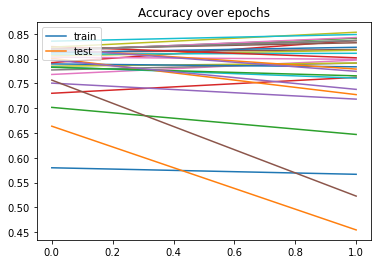

In [10]:
results = pd.DataFrame(history.history)

acc = results['accuracy']
val_acc = results['val_accuracy']
loss = results['loss']
val_loss = results['val_loss']
epochs=range(len(acc))

plt.plot([acc,val_acc])
plt.legend(['train', 'test'], loc='upper left')
plt.title("Accuracy over epochs")
plt.show()

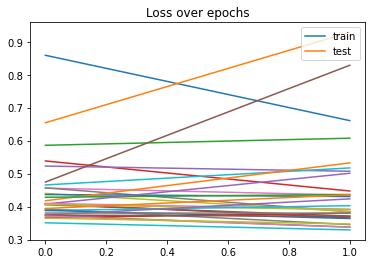

In [11]:
plt.plot([loss,val_loss])
plt.legend(['train', 'test'], loc='upper right')
plt.title("Loss over epochs")
plt.show()

<AxesSubplot:>

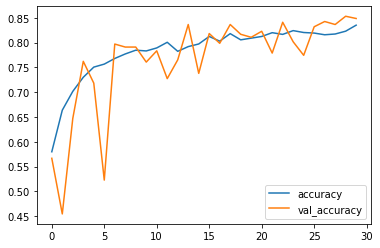

In [12]:
results.plot(y=['accuracy','val_accuracy'])


Let’s take a look at what our model predicts for the pictures we plotted earlier. I have defined a simple function to do that.


In [13]:
for i in model.predict(test_dataset):
    print(i)

[0.71436876]
[0.2620123]
[0.02406165]
[0.02275419]
[0.9257159]
[0.666538]
[0.25549644]
[0.8528841]
[0.22434595]
[0.60993576]
[0.05587456]
[0.43387553]
[0.6800276]
[0.7737256]
[0.00173056]
[5.2616895e-05]
[0.89274716]
[9.837905e-05]
[0.8692215]
[0.07985297]
[0.8966405]
[0.30520073]
[0.03525218]
[0.60139537]
[0.5109987]
[0.9432132]
[0.01963812]
[0.00345832]
[0.37892914]
[0.5819084]
[0.91366374]
[0.6564549]
[0.525695]
[0.5626454]
[0.7725746]
[0.94843256]
[0.7675657]
[0.54600704]
[0.05168998]
[0.0006901]
[0.0162425]
[0.69010746]
[0.02667499]
[0.0026738]
[0.6258057]
[0.5748818]
[0.00206903]
[2.380293e-06]
[0.52444965]
[0.3705415]
[0.02459946]
[0.7511318]
[0.5092508]
[0.00428802]
[0.45668858]
[3.7249352e-05]
[0.01294708]
[0.75150853]
[0.822417]
[0.38833743]
[0.15585938]
[0.34904695]
[0.00038946]
[0.00705391]
[0.723695]
[0.0013493]
[0.5418523]
[0.12272117]
[0.98967016]
[0.00379133]
[0.99992526]
[0.02369884]
[0.41947207]
[0.72196263]
[0.00709125]
[0.43208513]
[0.8982717]
[0.78783345]
[0.760807

In [14]:
def predict(image):
    np_image = img_to_array(image)
    np_image = np.expand_dims(np_image, axis=0)
    return model.predict(np_image)

In [18]:
filepath="./"
tf.keras.models.save_model(
    model, filepath, overwrite=True, include_optimizer=True, save_format=None,
    signatures=None, options=None
)

INFO:tensorflow:Assets written to: ./assets


In [20]:
imported_model=tf.saved_model.load(
    "./assets", tags=None, options=None
)

OSError: SavedModel file does not exist at: ./assets/{saved_model.pbtxt|saved_model.pb}